# Salary

Bu çalışmada, çalışanların deneyim yılına göre maaş tahmini yapmak için çeşitli regresyon modellerini analiz ediyorum.

### Gerekli Kütüphaneler

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### Veri Okuma

In [6]:
df = pd.read_csv("Salary.csv")

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### EDA (Keşifsel Veri Analizi)

In [9]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [10]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Görselleştirmeler

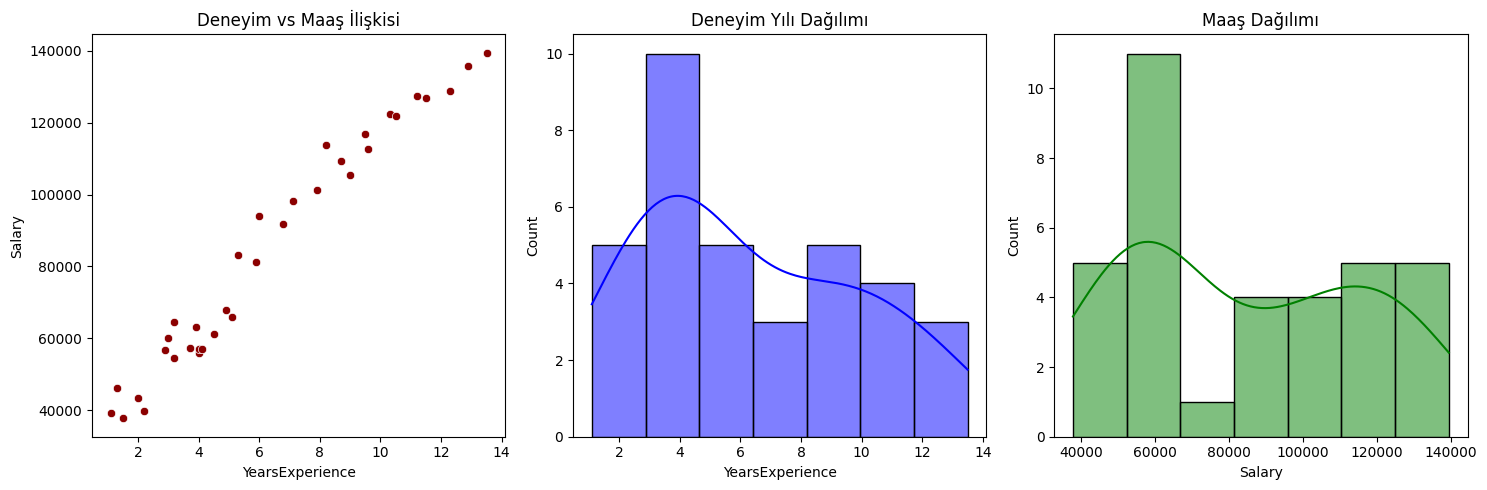

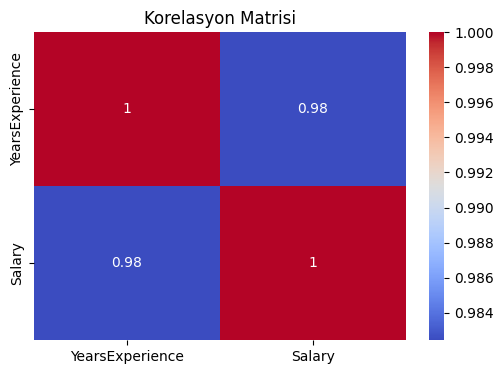

In [12]:
plt.figure(figsize=(15,5))

# Dağılım Grafiği
plt.subplot(1,3,1)
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='darkred')
plt.title('Deneyim vs Maaş İlişkisi')

# Histogramlar
plt.subplot(1,3,2)
sns.histplot(df['YearsExperience'], kde=True, color='blue')
plt.title('Deneyim Yılı Dağılımı')

plt.subplot(1,3,3)
sns.histplot(df['Salary'], kde=True, color='green')
plt.title('Maaş Dağılımı')

plt.tight_layout()
plt.show()

# Korelasyon Analizi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

### Veri Ön İşleme

In [14]:
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Modelleme Fonksiyonu
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'R2': round(r2_score(y_test, y_pred),3),
        'MAE': round(mean_absolute_error(y_test, y_pred),0),
        'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred)),0)
    }

# Modeller
results = {}

# 1. Basit Lineer Regresyon
lr = LinearRegression()
lr.fit(X_train, y_train)
results['Linear Regression'] = evaluate_model(lr, X_test, y_test)

# 2. Polinom Regresyon (Derece=2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
results['Polynomial (Degree=2)'] = evaluate_model(lr_poly, X_poly_test, y_test)

# 3. Ridge Regresyon (Regularization)
ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
ridge.fit(X_train, y_train)
results['Ridge Regression'] = evaluate_model(ridge, X_test, y_test)

# 4. XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
results['XGBoost'] = evaluate_model(xgb, X_test, y_test)

results_df = pd.DataFrame(results).T
print("\n📊 Model Performans Karşılaştırması:")
display(results_df)


📊 Model Performans Karşılaştırması:


,R2,MAE,RMSE
Linear Regression,0.891,6692.0,7467.0
Polynomial (Degree=2),0.918,5879.0,6508.0
Ridge Regression,0.890,6756.0,7511.0
XGBoost,0.891,6091.0,7493.0


### Sonuçları Karşılaştırma

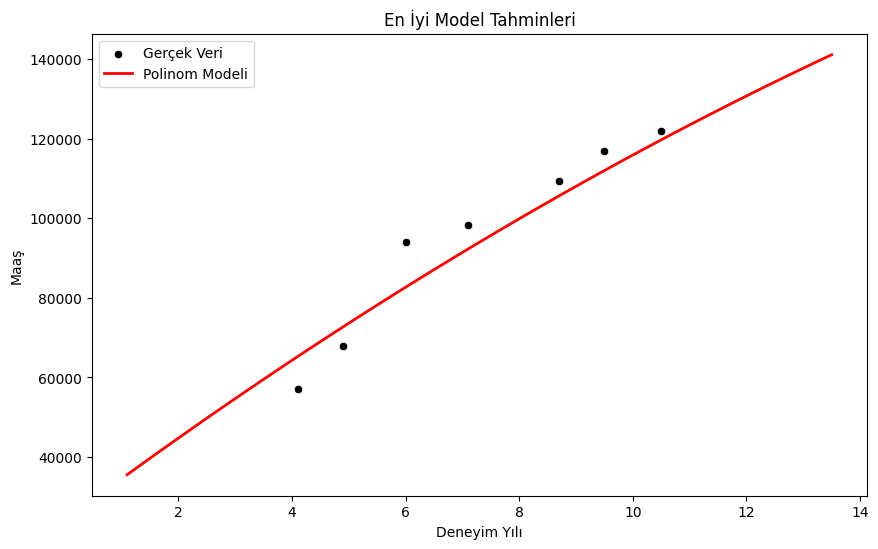

In [17]:
# En İyi Model ile Tahmin Görselleştirme
best_model = lr_poly  # Polinom modelini seçiyoruz
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_range = best_model.predict(X_range_poly)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='black', label='Gerçek Veri')
plt.plot(X_range, y_range, color='red', linewidth=2, label='Polinom Modeli')
plt.xlabel('Deneyim Yılı')
plt.ylabel('Maaş')
plt.title('En İyi Model Tahminleri')
plt.legend()
plt.show()

In [35]:
import joblib
joblib.dump(lr_poly, 'salary_prediction_model.pkl')
joblib.dump(poly, 'poly_features.pkl')

['poly_features.pkl']